In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [14]:
conda install python-graphviz

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.externals.six import StringIO
import pandas as pd                                         #imports pandas as pd
import plotly.express as px
from pydotplus import graph_from_dot_data
from IPython.display import Image

/Users/shiva/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [3]:
np.set_printoptions(suppress=True)

In [4]:
df = pd.read_csv('data_decision_trees.csv')   #loads data frame through pandas
df                                            #plots everything in a table format
df.head()                                     #plots only the first few rows of the file


Feature 01  Feature 02  Feature 03  Feature 04  Feature 05  Feature 06  \
0    0.269186    2.890367    1.893983   -0.420737   -0.828978   -3.815491   
1   -1.327319   -1.762721    1.031584    2.766727   -3.174990   -1.395544   
2    0.107028    3.964838    1.073601    0.758348    1.570392   -0.401011   
3   -2.294776   -3.894267   -0.571486    3.067353    2.892005   -0.235421   
4   -1.635072    4.305268    0.101267   -5.335998    1.072216    1.286368   

   Feature 07 Label  
0   -1.219257     B  
1   -3.284436     D  
2    3.332441     C  
3   -1.292745     A  
4    4.741389     A

In [5]:
#to plot the data
data_dimensions = df.columns[:-1].to_list()
figure_size = df.shape[1] * 256

fig = px.scatter_matrix(df, dimensions=data_dimensions, color='Label', width=figure_size, height=figure_size)
fig.show()

In [6]:
X = df.drop('Label', axis=1).to_numpy()   #drops the column named "lable" and get our data as NumPy arrays
y = df['Label'].to_numpy()                #creates Y for fitting from the "lable" column of data frame

In [7]:
X

array([[ 0.26918561,  2.89036704,  1.89398331, ..., -0.82897781,
        -3.81549087, -1.21925709],
       [-1.32731927, -1.76272079,  1.03158355, ..., -3.17499021,
        -1.39554398, -3.28443589],
       [ 0.10702806,  3.96483754,  1.07360074, ...,  1.57039201,
        -0.40101058,  3.33244142],
       ...,
       [-3.07708661,  1.40010747,  0.66318026, ...,  0.67277394,
         2.55021337,  0.03881049],
       [ 0.80313316,  1.58035675,  0.05473856, ...,  3.34084891,
        -1.81111266,  0.17659685],
       [-0.48022462,  3.95286668,  0.88674666, ...,  2.57476504,
         0.23366233,  3.80325314]])

In [8]:
X.shape

(1870, 7)

In [9]:
y

array(['B', 'D', 'C', ..., 'C', 'C', 'D'], dtype=object)

In [10]:
y.shape

(1870,)

In [11]:
(X_train, X_vt, y_train, y_vt) = train_test_split(X, y, test_size=0.4, random_state=0)
(X_validation, X_test, y_validation, y_test) = train_test_split(X_vt, y_vt, test_size=0.5, random_state=0)
#train_test_split only devides data to 2 sections, we use it twice to have 3 sets: train, validation, test

In [12]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)

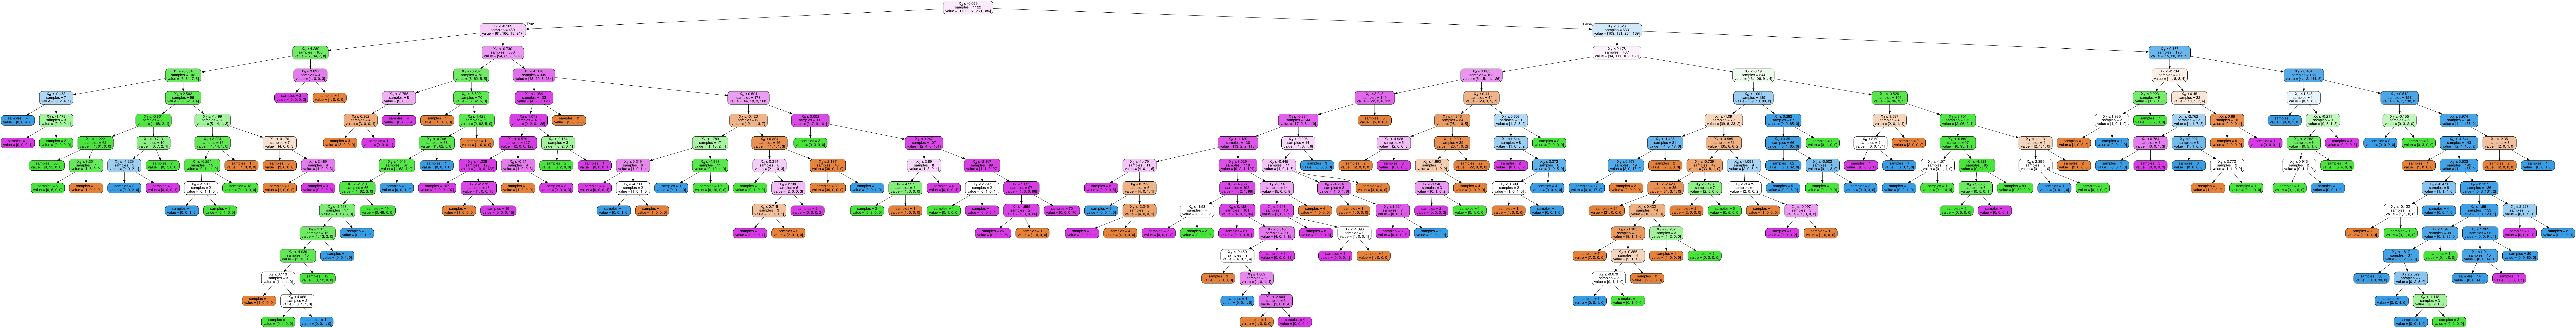

In [13]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, impurity=False, special_characters=True)
graph = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), unconfined=True)

In [16]:
yhat_train = dtree.predict(X_train)       #use the predict on training data, it fits perfect
accuracy_score(yhat_train, y_train)

1.0

In [17]:
yhat_validation = dtree.predict(X_validation)
accuracy_score(yhat_validation, y_validation)

0.8048128342245989

In [19]:
dtree2 = DecisionTreeClassifier(min_samples_leaf=15)
dtree2 = dtree2.fit(X_train,y_train)
yhat_train2 = dtree2.predict(X_train)
accuracy_score(yhat_train2, y_train)

0.8440285204991087

In [20]:
yhat_validation2 = dtree2.predict(X_validation)
accuracy_score(yhat_validation2, y_validation)

0.7887700534759359

In [21]:
yhat_test2 = dtree2.predict(X_test)
accuracy_score(yhat_test2, y_test)

0.7647058823529411